# Lista 5 - Física Computacional II

Aluna: Ylana Karolina Santos Lopes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

### Problema 1: Volume de uma Hiperesfera

In [2]:
n = 1000000 # número de pontos
d = 10 # número de dimensões


def f(x):
    r2 = np.zeros(x.shape[1],float)
    
    for xi in x:
        r2 += xi**2
        
    return r2 < 1

x = rd.random((d,n))*2 - 1



In [3]:
fx = f(x)
I = 2**d/n * np.sum(fx)

In [4]:
print(I)

2.541568


### Problema 2
#### a)
Pegando I dado como no enunciado, podemos ver que a integral diverge em $x = 0$, de forma que temos a desigualdade:
$$ x^{-1/2} > \frac{x^{-1/2}}{e^x +1}$$

integrando dos dois lados

$$ \int_{0}^{1} x^-1/2dx > \int_{0}^{1} \frac{x^{-1/2}}{e^x + 1} > 0 $$

$$ 2 >  \int_{0}^{1} \frac{x^{-1/2}}{e^x + 1} > 0 $$

Considerando $w(x) = x^{-1/2}$, podemos reescrever$

$$ w(x) = x^{-1/2} \Rightarrow p(x) = \frac{1}{2\sqrt{x}} $$

De foirma que temos I:

$$ I \approx \frac{2}{N} \sum_{i=1}^{N} g(x_i) $$

Em que 

$$  g(x) = \frac{1}{e^x + 1} \quad e \quad f(x) = \frac{x^{-1/2}}{e^x + 1}$$
 

In [5]:
### Letra b)

N = 10000000

z = rd.random(N)
x = z**2

def g(x):
    return 1/(1+np.exp(x))

I = np.sum(g(x))/N*2

In [6]:
print(I)

0.838962993463592


### Problema 3: O Modelo de Ising
#### a), b) c) 

In [68]:
rd.seed(5)

N = 20
J = 1
T = 1
kb = 1
beta = 1
steps = 1000000

In [69]:
s = np.empty((N,N),int)

for i in range(N):
    for j in range(N):
        if rd.random() < 0.5:
            s[i,j]=1
        else:
            s[i,j]=-1

In [70]:
def ene(s):

    s1 = s[:-1,:]*s[1:,:]
    s2 = s[:,:-1]*s[:,1:]
    
    E = -J*(np.sum(s1) + np.sum(s2))
    
    return E

In [71]:
Mplot, eplot = [],[]
E1 = ene(s)
M = np.sum(s)

print(E1)

-60


In [72]:
for k in range(steps):
    i = rd.randint(N)
    j = rd.randint(N)

    s[i,j] *=-1

    E2 = ene(s)

    delE = E2 - E1

    if delE>0:
        if rd.random() < np.exp(-beta*delE):
            E1 = E2 
            M = np.sum(s)
        else:
            s[i,j ]*= -1
    else:
        E1 = E2 
        M = np.sum(s)
        
    Mplot.append(M)   

Text(0, 0.5, 'Magnetização total')

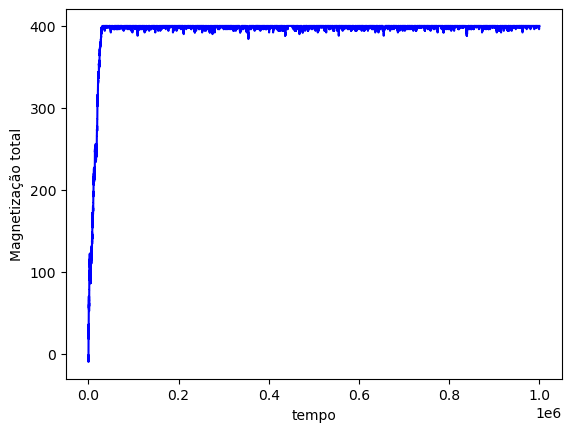

In [73]:
plt.plot(Mplot, color='blue')
plt.xlabel('tempo')
plt.ylabel('Magnetização total')

#### d) 
Quando o número de passos (steps) é menor ($~10^4$), é possível perceber a oscilação da magnetização até chegar ao equilibrio em cerca de 400. AO aumentarmos o número de passos para 1 milhão, vemos que o gráfico passa a ter um comportamento expontâneo, se estabilizando bem mais rápido que os outros casos. Isso se dá por estasrmos tratando de um material ferromagnético, onde a menor energia se dá quando os dipolos estão alinhados, logo se estabilizando.

### Problema 4: O mínimo global de uma função
#### a) 

In [45]:
Tmax = 1
Tmin = 1e-3
tau = 1e4
x0 = 2

In [52]:
def f(x):
    return x**2 - np.cos(4*np.pi*x)

fx = f(x0)
t = 0
T = Tmax
x = x0
xlist = []

In [53]:
while T > Tmin:
    
    t += 1
    T = Tmax*np.exp(-t/tau)

    prior_X = x
    prior_fx = fx
    r = rd.standard_normal()
    x += r
    fx = f(x)

    delta_fx = fx - prior_fx

    if rd.random()>np.exp(-delta_fx/T):
        x = prior_X
        fx = prior_fx
    xlist.append(x)

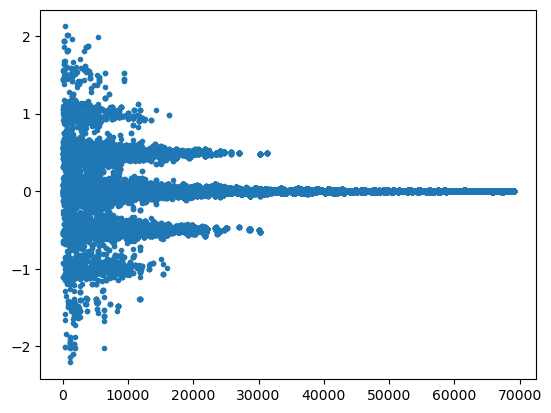

In [57]:
plt.plot(xlist, '.')


In [48]:
print(x) ## bem próximo de x = 0

-0.002267534689587008


#### b)

In [62]:
def g(x):
    if x > 0 and x < 50:
        return np.cos(x) + np.cos(np.sqrt(2)*x + np.cos(np.sqrt(3)*x))
    else:
        return 1e10

In [67]:
x0 = 1
gx = g(x0)
t = 0
x = x0
T = Tmax
xlist = []

while T > Tmin:
    
    t += 1
    T = Tmax*np.exp(-t/tau)

    prior_X = x
    prior_gx = gx
    r = rd.standard_normal()
    x += r
    gx = g(x)

    delta_gx = gx - prior_gx

    if rd.random()>np.exp(-delta_gx/T):
        x = prior_X
        gx = prior_gx

    xlist.append(x)

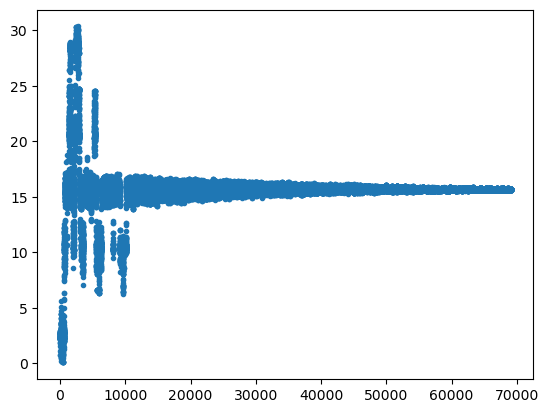

In [64]:
plt.plot(xlist, '.')

In [65]:
print(x)

15.697212143297392
